In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
palette="Set1"

In [3]:
oxi = pd.read_csv("normalisation.csv", sep=",", index_col=False)
#oxi["oxidation"] = oxi["IntDen"]/oxi["Area"]
oxi["Ponceau-protein"] = oxi["Ponceau-density"]/oxi["Ponceau-area"]
oxi["Blot-oxidation"] = oxi["Blot-density"]/oxi["Blot-area"]
oxi["Oxidation index"] = (oxi["Blot-oxidation"]/oxi["Ponceau-protein"])*100
oxi.head()

,gel,sample,line,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
0,1,fresh,mef,29699.968,0.477,36.793,0.193,62264.083857,190.637306,0.306175
1,1,fresh,mef,24468.744,0.392,29.724,0.172,62420.265306,172.813953,0.276856
2,1,frozen,mef,26390.512,0.422,29.557,0.184,62536.758294,160.635870,0.256866
3,1,frozen,mef,35570.615,0.570,40.456,0.223,62404.587719,181.417040,0.290711
4,1,fresh,mefxCG4190,36617.818,0.587,40.646,0.230,62381.291312,176.721739,0.283293


Sample order: mef, mefxCG4190


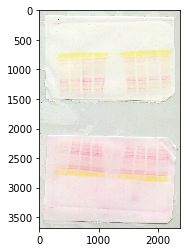

In [4]:
# one path (gel2, 1)was excluded from data because of beeing outlier of Q3+1,5x interqaurtile range

img = plt.imread("oxi-16-05-19.tif")
img_1 = plt.imread("ChemiDocMp 2019-05-17 11hr 29min+ChemiDocMp 2019-05-17 11hr 27min_Exposure_30.0sec.tif")
img_2 = plt.imread("ChemiDocMp 2019-05-17 11hr 34min+ChemiDocMp 2019-05-17 11hr 33min_Exposure_18.4sec.tif")
plt.imshow(img);

print(f"Sample order: mef, mefxCG4190")

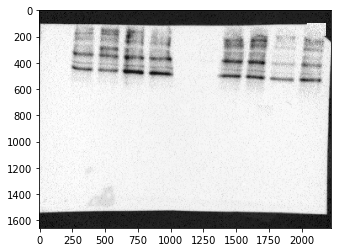

In [5]:
plt.imshow(img_1);

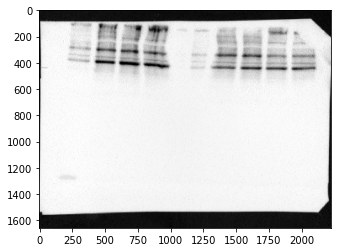

In [6]:
plt.imshow(img_2);

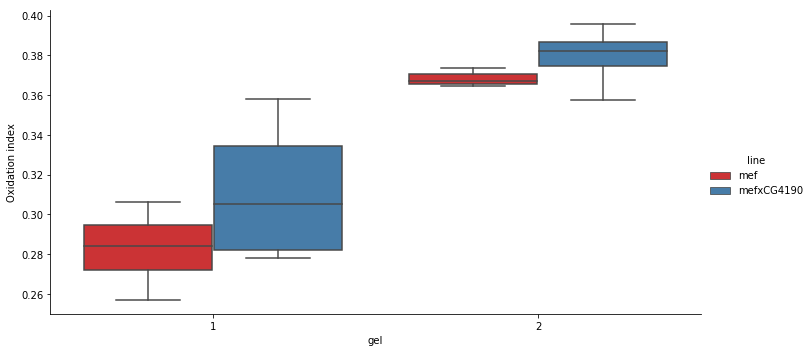

In [7]:
gel_1 = oxi[oxi["gel"] == 1]
gel_2 = oxi[oxi["gel"] == 2]

sns.catplot("gel", "Oxidation index", data=oxi, kind="box", hue="line", palette=palette, aspect=2.0)
# plt.savefig("gels_2.png")

<Figure size 1440x1440 with 0 Axes>

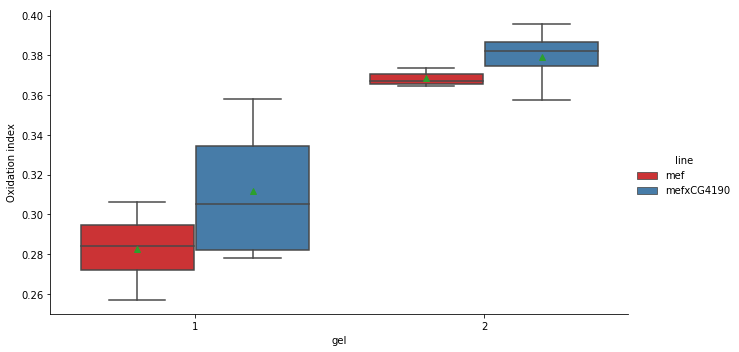

In [8]:
plt.figure(figsize=(20, 20))
sns.catplot("gel", "Oxidation index", data=oxi, kind="box", hue="line", palette=palette, aspect=1.8,showmeans=True )

# plt.savefig("gels_2.png")
# poziom oksydacji zależnie od żelu

In [9]:
oxi.describe()

,gel,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.466667,24132.685200,0.405267,51.640533,0.261000,58801.753865,194.440203,0.333265
std,0.516398,7164.024533,0.097227,16.074458,0.059254,4642.074168,19.674162,0.046921
min,1.000000,14275.143000,0.278000,29.557000,0.172000,51349.435252,160.635870,0.256866
25%,1.000000,18623.859000,0.320500,39.039000,0.220000,54760.846821,179.069390,0.287002
50%,1.000000,24468.744000,0.392000,49.274000,0.254000,62236.944898,192.518293,0.357426
75%,2.000000,29018.630500,0.465500,61.790500,0.303000,62410.766327,209.172487,0.370454
max,2.000000,36617.818000,0.587000,78.638000,0.355000,62536.758294,223.403409,0.395871


<Figure size 432x288 with 0 Axes>

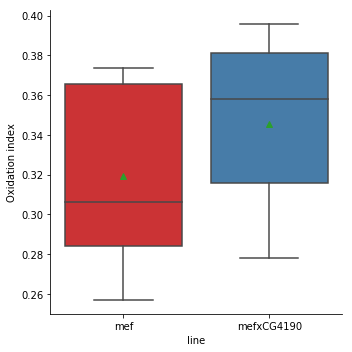

In [10]:
#wyniki zsumowane ze wszystkich żeli
plt.figure()

sns.catplot("line", "Oxidation index", data=oxi, kind="box", palette=palette, showmeans=True )
#sns.catplot("sample", "Oxidation index", data=oxi, kind="box", palette=palette, showmeans=True )

# plt.savefig("oxidation")


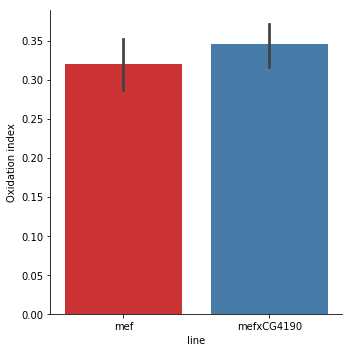

In [11]:
sns.catplot("line", "Oxidation index", data=oxi, kind="bar", palette=palette)

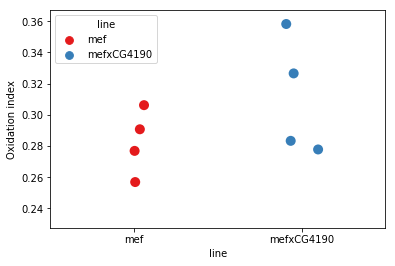

In [12]:
# poziom oksydacji, osobno każdy żel, zależnie od tego czy mrożone czy nie
sns.stripplot(x="line", y="Oxidation index", data=gel_1,hue="line", palette=palette,jitter=True, size=10)
# plt.savefig("gel1")

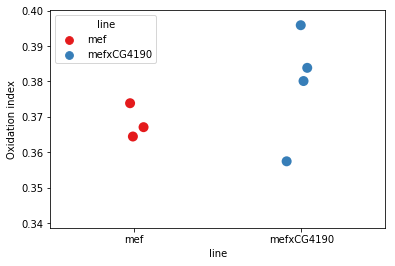

In [13]:
sns.stripplot(x="line", y="Oxidation index", data=gel_2,hue="line", palette=palette,jitter=True, size=10)
# plt.savefig("gel2")


In [14]:
# poziom oksydacji tylko dla świeżych lizatów

fresh = oxi[oxi["sample"] == "fresh"]
frozen = oxi[oxi["sample"] == "frozen"]

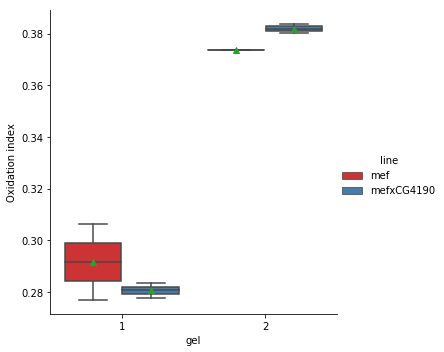

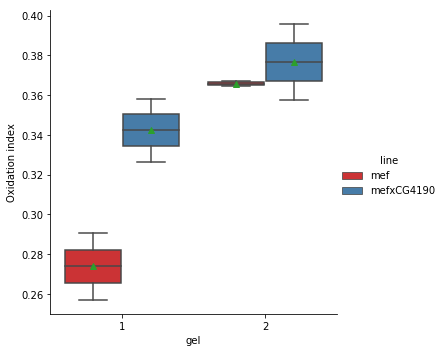

In [15]:
sns.catplot("gel", "Oxidation index", data=fresh, kind="box",hue="line", palette=palette, showmeans=True )
sns.catplot("gel", "Oxidation index", data=frozen, kind="box",hue="line", palette=palette, showmeans=True )

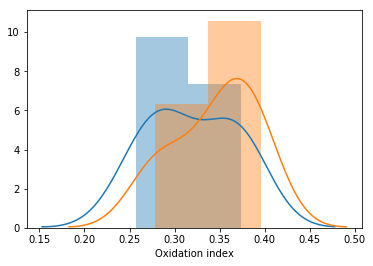

In [16]:
mef = oxi[oxi["line"] == "mef"]
mef_cg = oxi[oxi["line"] == "mefxCG4190"]
sns.distplot(mef["Oxidation index"]) #blue
sns.distplot(mef_cg["Oxidation index"])#orange

In [17]:
mef.describe()

,gel,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.428571,23513.771000,0.399143,42.194143,0.228857,57902.082248,182.735379,0.319421
std,0.534522,7837.088402,0.102821,11.932205,0.053841,5627.384489,12.198093,0.048274
min,1.000000,14275.143000,0.278000,29.557000,0.172000,51349.435252,160.635870,0.256866
25%,1.000000,17095.707500,0.327500,33.258500,0.188500,52169.722655,177.115497,0.283783
50%,1.000000,24468.744000,0.392000,40.456000,0.223000,62264.083857,187.133065,0.306175
75%,2.000000,28045.240000,0.449500,47.841500,0.251000,62412.426513,191.577799,0.365751
max,2.000000,35570.615000,0.570000,63.146000,0.328000,62536.758294,193.992126,0.373836


In [18]:
mef_cg.describe()

,gel,Ponceau-density,Ponceau-area,Blot-density,Blot-area,Ponceau-protein,Blot-oxidation,Oxidation index
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.500000,24674.235125,0.410625,59.906125,0.289125,59588.966530,204.681924,0.345379
std,0.534522,7020.156116,0.098863,15.080590,0.050991,3799.543310,19.741519,0.045237
min,1.000000,17292.123000,0.313000,37.622000,0.217000,54451.238227,173.373272,0.277766
25%,1.000000,19211.921750,0.323750,53.979500,0.256250,55412.070276,196.326268,0.315724
50%,1.500000,23464.996500,0.400000,59.757000,0.290000,62181.224157,209.172487,0.357819
75%,2.000000,28876.995500,0.463000,69.287250,0.323500,62390.204717,220.593356,0.381032
max,2.000000,36617.818000,0.587000,78.638000,0.355000,62503.412141,223.403409,0.395871


In [19]:
((0.345379 - 0.319421)/ 0.345379)*100

7.515801481850367

In [20]:
median_mef = mef["Oxidation index"].median()
median_mef

0.30617539661542015

In [21]:
median_cg = mef_cg["Oxidation index"].median()

In [22]:
((median_cg - median_mef)/median_cg)*100

14.432765681227924

In [26]:
shapiro(mef["Oxidation index"])

(0.8752678632736206, 0.2062578648328781)

In [40]:
mannwhitneyu(mef["Oxidation index"] + 0.319, mef_cg["Oxidation index"])

MannwhitneyuResult(statistic=0.0, pvalue=0.0007300309581211239)

In [44]:
spearmanr(list(mef["Oxidation index"])+ [0.319], list(mef_cg["Oxidation index"]))
#mef["Oxidation index"]

SpearmanrResult(correlation=0.6666666666666669, pvalue=0.07098765432098751)

In [39]:
mef_cg["Oxidation index"]

4     0.283293
5     0.277766
6     0.358211
7     0.326534
11    0.380100
12    0.383828
13    0.395871
14    0.357426
Name: Oxidation index, dtype: float64